<a href="https://colab.research.google.com/github/anselmo-pitombeira/Notebooks/blob/master/Simulacao_Fila_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tamanho médio da fila =  8.097447366493341
Tempo médio de espera =  534.300463635301
Utilização do servidor =  0.9235193470055707


Text(0, 0.5, 'Tamanho da fila')

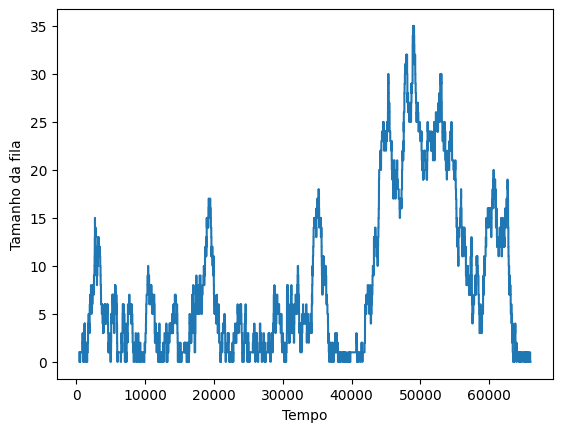

In [25]:
# -*- coding: utf-8 -*-
from numpy.random import default_rng
import matplotlib.pyplot as plt

seed = 42
rng = default_rng(seed)

t = 0              #Variável relógio
q = 0              #Tamanho da fila
b = 0              #Estado do servidor

ta_medio = 60.0
tec_medio = 65.0

t_chegadas = []    #Registro do tempo de chegada dos clientes
                   #na fila
t_esperas = []       #Registro dos tempos de espera
t_ult_ev = 0       #Registra o tempo de ocorrência
                   #do último evento
area_q = 0         #Acumula a área sob Q(t)
area_b = 0         #Acumula a área sob B(t)

reg_t = []          ##Registro dos instante de atualização de Q(t)
#reg_t.append(0)
reg_q = []          ##Registro dos valores de Q(t)
#reg_q.append(0)

reg_t2 = []         ##Registro dos instante de atualização de B(t)
reg_t2.append(0)
reg_b = []          ##Registro dos valores de B(t)
reg_b.append(0)


EVENTOS = []       #Lista de eventos

#Geração dos eventos de chegada

n = 1000    #Número de chegadas
t = 0      #Inicialização da variável tempo

#Loop de geração dos eventos

for i in range(n):

    tec = rng.exponential(tec_medio)   ##tec do cliente i
                                  #com lambda = 1/90.0
    c = t+tec                     #Momento de ocorrência da chegada

    EVENTOS.append([c,'chegada']) #Adiciona o evento à lista

    t = c                         #Atualiza o a variável tempo
                                  #para o momento de ocorrência
                                  #da chegada gerada

##Loop de processamento da lista de eventos

while len(EVENTOS) > 0:         #Repita enquanto houver
                                #eventos na lista

    EVENTOS.sort()              #Ordena os eventos em ordem
                                #crescente dos momentos de

    evento = EVENTOS.pop(0)     #Retira o primeiro evento da lista (próximo evento a ocorrer)

    t = evento[0]               #Atualiza o tempo para o
                                #momento de ocorrência do
                                #próximo evento


    if evento[1] == "chegada":

        ##print t, "Chegada"

        area_q = area_q+(t-t_ult_ev)*q   #Atualização da área sob Q(t)
        area_b = area_b+(t-t_ult_ev)*b   #Atualização da área sob B(t)
        t_ult_ev = t                     #Atualiza momento do último evento

        if b == 1:                       #Se o servidor estiver ocupado

            q = q+1                      #Atualização de Q(t)
                                               #Põe o cliente na fila
            reg_t.append(t)           #Guarda o momento de mudança de Q(t)
            reg_q.append(q)         #Guarda o novo valor de Q(t)

            t_chegadas.append(t)         #Registra momento de chegada

        else:                            #O servidor está desocupado

            espera = 0                   #Não há fila. Espera zero
            t_esperas.append(espera)     #Atualiza vetor de esperas
            b = 1                        #Atualiza o estado do servidor
            reg_t2.append(t)             #Guarda o momento de mudança de B(t)
            reg_b.append(b)              #Guarda o novo valor de B(t)
            ta = rng.exponential(ta_medio)  #Gera tempo de atendimento
            s = t+ta                     #Determina momento de ocorrência da saída
            EVENTOS.append([s, 'saida']) #Adiciona evento saída à lista

    if evento[1] == "saida":

     area_q = area_q+(t-t_ult_ev)*q  #Atualização da área sob Q(t)
     area_b = area_b+(t-t_ult_ev)*b  #Atualização da área sob B(t)
     t_ult_ev = t                    #Atualiza momento do último evento

     if q == 0:                      #Se não há clientes na fila

         b = 0                       #servidor fica desocupado
         reg_t2.append(t)             #Guarda o momento de mudança de B(t)
         reg_b.append(b)              #Guarda o novo valor de B(t)

     else:                           #Há clientes na fila

         q = q-1                     #Decrementa o tamanho da fila
                                          #(Retira o cliente da fila)

         reg_t.append(t)           #Guarda o momento de mudança de Q(t)
         reg_q.append(q)         #Guarda o novo valor de Q(t)

         espera = t-t_chegadas.pop(0) #Calcula o tempo de espera

         t_esperas.append(espera)    #Adiciona o tempo de espera                                                         #ao vetor de esperas

         b = 1                       #Servidor inicia atendimento
         reg_t2.append(t)             #Guarda o momento de mudança de B(t)
         reg_b.append(b)              #Guarda o novo valor de B(t)
         ta = rng.exponential(ta_medio) #Gera tempo de atendimento
         s = t+ta                    #Determina momento de ocorrência da saída
         EVENTOS.append([s, 'saida']) #Adiciona evento saída à lista

##Cálculo das estimativas

tam_medio_fila = area_q/t                   #Tamanho médio da fila

t_espera_medio = sum(t_esperas)/float(n)    #Tempo médio de espera

util_servidor = area_b/t                    #Utilização do servidor

print("Tamanho médio da fila = ", tam_medio_fila)
print("Tempo médio de espera = ",t_espera_medio)
print("Utilização do servidor = ", util_servidor)

##Exibição dos gráficos

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(reg_t, reg_q, drawstyle = 'steps')
plt.xlabel("Tempo")
plt.ylabel("Tamanho da fila")

#fig2 = plt.figure()
#ax2 = fig2.add_subplot()
#ax2.plot(reg_t, reg_q)
#ax2.plot(reg_t2, reg_b, drawstyle = 'steps')
